In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wine_reviews = pd.read_csv("Wine reviews- v2.csv")

In [3]:
wine_reviews = wine_reviews.drop(columns=['Unnamed: 0','description'])
wine_reviews.head()

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
wine_reviews=wine_reviews.drop_duplicates(['title'])
wine_reviews=wine_reviews.reset_index(drop=True)
len(wine_reviews)

118840

In [5]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118840 entries, 0 to 118839
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                118781 non-null  object 
 1   designation            84551 non-null   object 
 2   points                 118840 non-null  int64  
 3   price                  110581 non-null  float64
 4   province               118781 non-null  object 
 5   region_1               99346 non-null   object 
 6   region_2               46568 non-null   object 
 7   taster_name            94107 non-null   object 
 8   taster_twitter_handle  89587 non-null   object 
 9   title                  118840 non-null  object 
 10  variety                118839 non-null  object 
 11  winery                 118840 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.9+ MB


In [6]:
wine_reviews.describe()

,points,price
count,118840.000000,110581.000000
mean,88.443748,35.587162
std,3.094261,41.895316
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
wine_missing = pd.DataFrame()
wine_missing['Total'] = wine_reviews.isnull().sum()
wine_missing['Percent'] = wine_reviews.isnull().sum()/len(wine_reviews.index) * 100
wine_missing.columns = ['Total','Percent']
wine_missing.sort_values(by='Total', ascending=False)

,Total,Percent
region_2,72272,60.814541
designation,34289,28.853080
taster_twitter_handle,29253,24.615449
taster_name,24733,20.812016
region_1,19494,16.403568
price,8259,6.949680
country,59,0.049647
province,59,0.049647
variety,1,0.000841
points,0,0.000000


In [8]:
wine_reviews=wine_reviews.dropna(subset=['price'])
wine_reviews=wine_reviews.reset_index(drop=True)

In [9]:
wine_missing = pd.DataFrame()
wine_missing['Total'] = wine_reviews.isnull().sum()
wine_missing['Percent'] = wine_reviews.isnull().sum()/len(wine_reviews.index) * 100
wine_missing.columns = ['Total','Percent']
wine_missing.sort_values(by='Total', ascending=False)

,Total,Percent
region_2,64213,58.068746
designation,31855,28.806938
taster_twitter_handle,27580,24.940993
taster_name,23106,20.895090
region_1,17955,16.236967
country,55,0.049737
province,55,0.049737
variety,1,0.000904
points,0,0.000000
price,0,0.000000


In [10]:
#Instead of plotting correlation plots and dropping columns where correlations are close to 1 or -1
#Using Univariate feature selection for this process
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor, cv

X=wine_reviews.drop(columns=['points'])
X=X.fillna(-1)
print(X.columns)
Y=wine_reviews['points']

Index(['country', 'designation', 'price', 'province', 'region_1', 'region_2',
       'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [11]:
category_features =[0,1,3,4,5,6,7,8,9,10]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=52)

In [13]:
#Defining the predictive model
def perform_model(X_train, Y_train, X_valid, Y_valid, X_test, Y_test):
    model = CatBoostRegressor(random_seed = 400, loss_function = 'RMSE', iterations=400,)
    
    model.fit(X_train, Y_train, cat_features = category_features, eval_set=(X_valid, Y_valid), verbose=False)
    
    print("R^2 on training data: "+ model.score(X_train, Y_train).astype(str))
    print("R^2 on test data: "+ model.score(X_test, Y_test).astype(str))
    
    return model

In [14]:
#Calling the model to check the results
model=perform_model(X_train, Y_train, X_valid, Y_valid, X_test, Y_test)

R^2 on training data: 0.652013046729646
R^2 on test data: 0.5678540674915168


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

Y_train_predictions = model.predict(X_train)
Y_test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_predictions))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_predictions))

print(f"RMSE on training data: {train_rmse}")
print(f"RMSE on test data: {test_rmse}")

RMSE on training data: 1.8273600201757045
RMSE on test data: 2.039824104928918


In [16]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=Y, cat_features=category_features)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

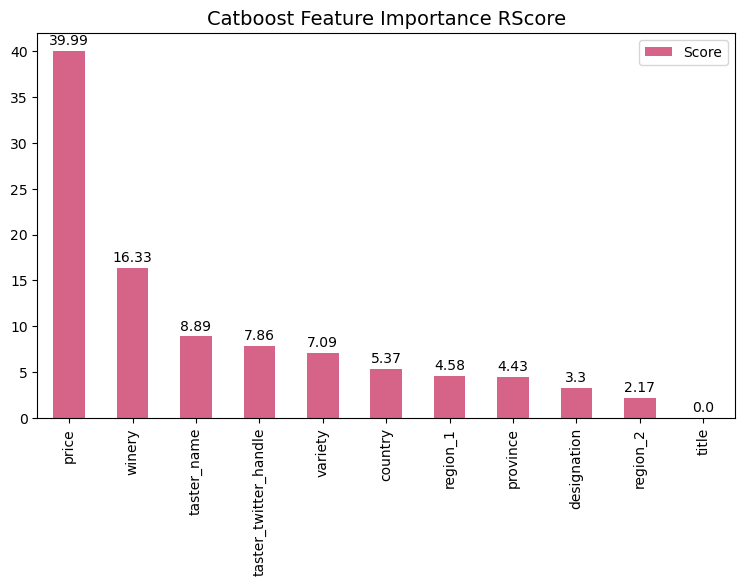

In [291]:
plt.rcParams["figure.figsize"] = (9,5)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='#d56488')
ax.set_title("Catboost Feature Importance RScore", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [17]:
# Features of a new product for a score prediction
data = {
    'country': ['France'],
    'designation': [''],
    'price': [52.0],
    'province': [''],
    'region_1': ['Bordeaux'],
    'region_2': [''],
    'taster_name': ['Roger Voss'],
    'taster_twitter_handle': ['@vossroger'],
    'title': ['Château du Taillan 2015 du Taillan (Bordeaux SupÃ©rieur)'],
    'variety': ['Bordeaux-style Red Blend'],
    'winery': ['Château du Taillan']
}

X_pred = pd.DataFrame(data)

X_pred = X_pred[['country', 'designation', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']]

# Predicting the score
prediction = model.predict(X_pred)
print("Prediction for X_pred: " + str(prediction))

Prediction for X_pred: [89.32643253]
